<a href="https://colab.research.google.com/github/Radha-12/AI_ML/blob/main/Ensemble_Techniques_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ensemble Techniques Project**

**▶ PART - A**

**1. Data Understanding**

In [ ]:
#Import Neccessary libraries
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from scipy.stats import uniform, randint
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import mode
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# To read all the 2 CSV files as DataFrame and store them into 2 separate variables.
dfC1 = pd.read_csv('/content/drive/MyDrive/AI /Dec AI/Project - Ensemble Techniques/TelcomCustomer-Churn_1.csv')
dfC2 = pd.read_csv('/content/drive/MyDrive/AI /Dec AI/Project - Ensemble Techniques/TelcomCustomer-Churn_2.csv')

In [ ]:
# To get the shapes of 2 dataframes
print(dfC1.shape)
print(dfC2.shape)

(7043, 10)
(7043, 12)


dfC1 dataframe having 7043 instances and 10 columns.

dfC2 dataframe having 7043 instances and 12 columns.

In [ ]:
dfC1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB


*  There are no null values that need to be treated.
*  Features having Object values are customerID,Gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity.
*  Features having int values are SeniorCitizen and tenure.
*  We have 7043 instances and 10 columns with memory usage is 550.4+ kB.





In [ ]:
dfC2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   OnlineBackup      7043 non-null   object 
 2   DeviceProtection  7043 non-null   object 
 3   TechSupport       7043 non-null   object 
 4   StreamingTV       7043 non-null   object 
 5   StreamingMovies   7043 non-null   object 
 6   Contract          7043 non-null   object 
 7   PaperlessBilling  7043 non-null   object 
 8   PaymentMethod     7043 non-null   object 
 9   MonthlyCharges    7043 non-null   float64
 10  TotalCharges      7043 non-null   object 
 11  Churn             7043 non-null   object 
dtypes: float64(1), object(11)
memory usage: 660.4+ KB


*  There are no null values that need to be treated.
*  Features having Object values are customerID, OnlineBackup,  DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract,PaperlessBilling, PaymentMethod, TotalCharges, Churn.
*  Features having float value is MonthlyCharges.
*  We have 7043 instances and 12 columns with memory usage is 660.4+ kB.

In [ ]:
# Compare 2 dataframes columns
if set(dfC1.columns) == set(dfC2.columns):
    print("All two DataFrames have same columns")
else:
    print("Some difference in one of the DataFrames")

Some difference in one of the DataFrames


Found columns in one of the dataframes are not same with the other.

**2. Data Preparation and Exploration**

In [ ]:
# Creating copy of the dataframe
df1=dfC1.copy(deep = True)
df2=dfC2.copy(deep = True)

In [ ]:
df = pd.merge(df1, df2,on='customerID') # To merge the two dataframes into a single dataframe

Merged the two dataframes on key ‘customerID’ to form a single DataFrame.

In [ ]:
df.info() # To get the Columns and instances along with datatypes and memory usage

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


*  There are no null values that need to be treated.
*  Features having Object values are customerID, Gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup,  DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract,PaperlessBilling, PaymentMethod, TotalCharges, Churn.
*  Features having float value is MonthlyCharges.
*  Features having int value is tenure.
*  We have 7043 instances and 21 columns with memory usage is 1.2+ MB.

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Check for all columns are incorporated in merged dataframe or not
if set(['customerID','gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn']).issubset(df.columns):
   print("All columns are present : Yes")
else:
   print("All columns are not present : No")

All columns are present : Yes


In [ ]:
print(df1.shape[1])
print(df2.shape[1])
print(df.shape[1] - 1)

10
12
20


In [ ]:
df1.shape[1] + df2.shape[1] -1 == df.shape[1]

True

Found all the columns are incorported in merged dataframe.

In [ ]:
# Print Feature-wise percentage of Null values
percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing)

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


Found there are no missing values in all the features/columns

In [ ]:
# To change the values of the expected values like ‘?’, ‘a’, 1.5 in all the features to 0/1
col_list = df.select_dtypes(include='object').columns

In [ ]:
# Using for loop, for getting all the unique values of the features each
for i in col_list:
    print('Unique values in {} are \n'.format(i),df[i].value_counts())
    print(i)
    print('*'*20)

Unique values in customerID are 
 7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
customerID
********************
Unique values in gender are 
 Male      3555
Female    3488
Name: gender, dtype: int64
gender
********************
Unique values in Partner are 
 No     3641
Yes    3402
Name: Partner, dtype: int64
Partner
********************
Unique values in Dependents are 
 No     4933
Yes    2110
Name: Dependents, dtype: int64
Dependents
********************
Unique values in PhoneService are 
 Yes    6361
No      682
Name: PhoneService, dtype: int64
PhoneService
********************
Unique values in MultipleLines are 
 No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
MultipleLines
********************
Unique values in InternetService are 
 Fiber optic    309

In [ ]:
# To change the datatypes of the following features: ‘TotalCharges’ to 'float64'

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
# Replacing ' ' with '0'
df.replace(' ', inplace= True)
df = df.fillna(0)

In [ ]:
# Replacing '0' with mean
df['TotalCharges'] = np.where(df['TotalCharges']==0,df['TotalCharges'].mean(),df['TotalCharges'])

In [ ]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
# Using function to plot Pie-Charts for all categorical variables in the dataframe

# Takes in a dataframe(df) and plots pie charts for all categorical columns.
def pie_charts_for_CategoricalVar(df):
    df_p = pd.DataFrame()
    for i,col in enumerate(df.columns):
        if df[col].dtypes == 'object' and col !='customerID': # To fetch all the features with datatype as 'Object' except customerID feature
            df_p[col]= df[col]
            k = df[col].value_counts()
            plt.pie(k,autopct='%.0f%%',labels=df_p[col].value_counts().index)
            plt.title(col,bbox={'facecolor':'0.9', 'pad':5})
            plt.show()
            print('-'*100)

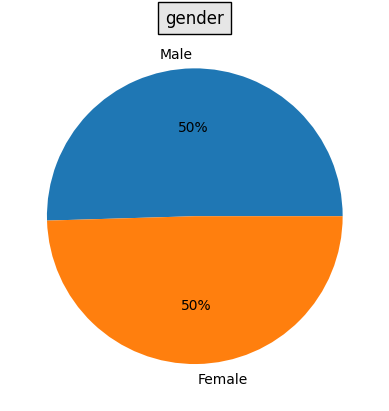

----------------------------------------------------------------------------------------------------


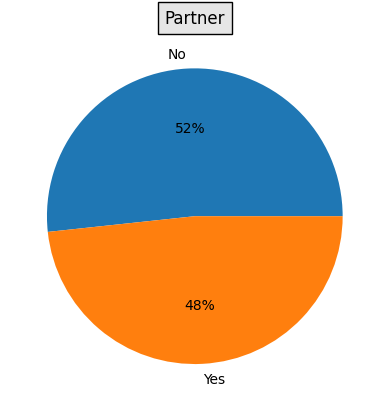

----------------------------------------------------------------------------------------------------


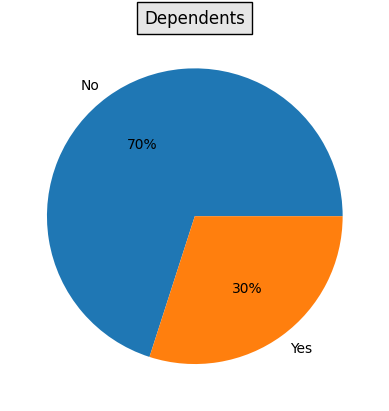

----------------------------------------------------------------------------------------------------


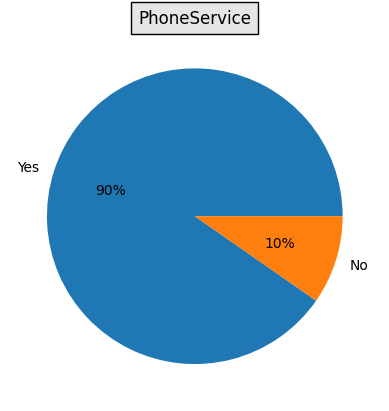

----------------------------------------------------------------------------------------------------


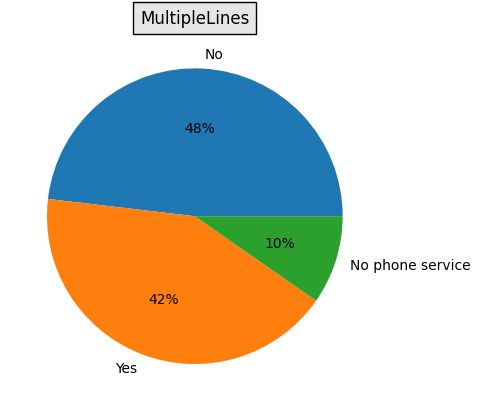

----------------------------------------------------------------------------------------------------


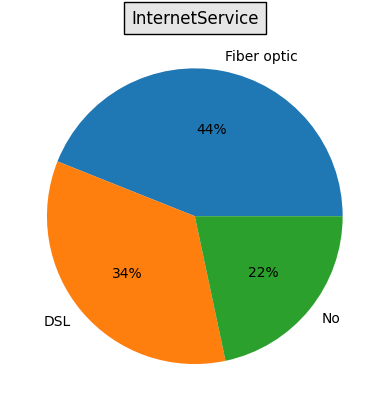

----------------------------------------------------------------------------------------------------


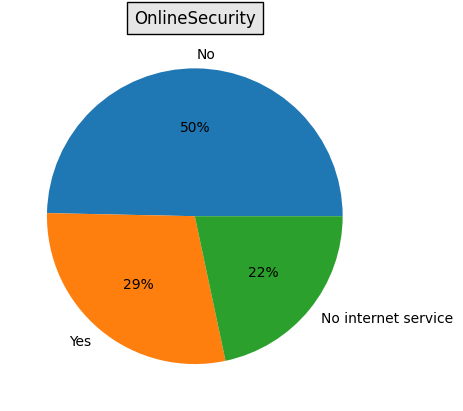

----------------------------------------------------------------------------------------------------


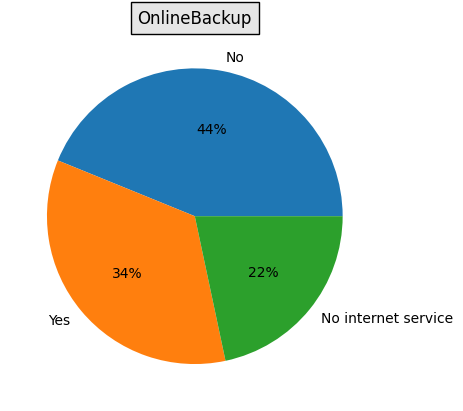

----------------------------------------------------------------------------------------------------


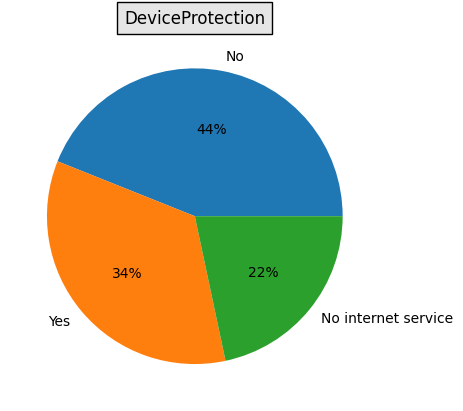

----------------------------------------------------------------------------------------------------


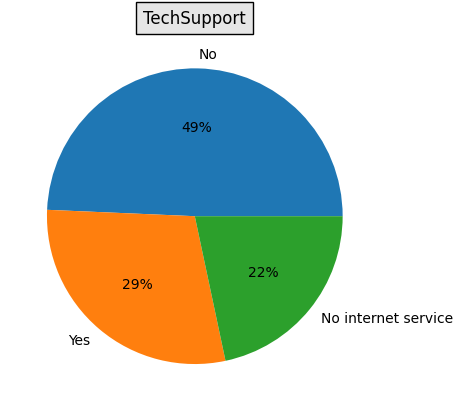

----------------------------------------------------------------------------------------------------


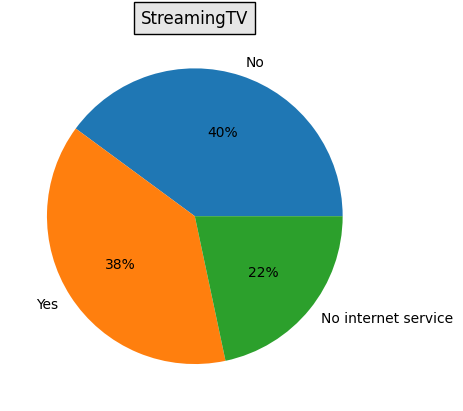

----------------------------------------------------------------------------------------------------


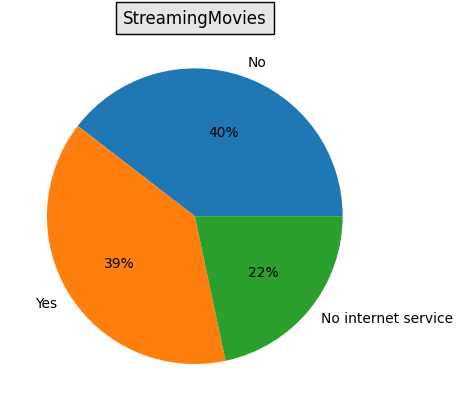

----------------------------------------------------------------------------------------------------


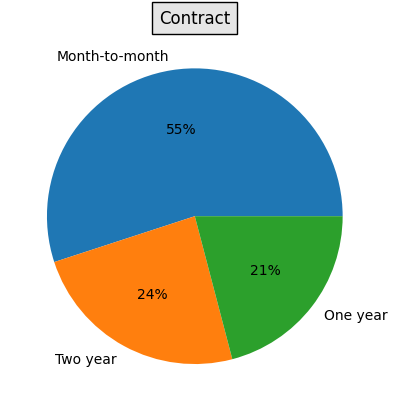

----------------------------------------------------------------------------------------------------


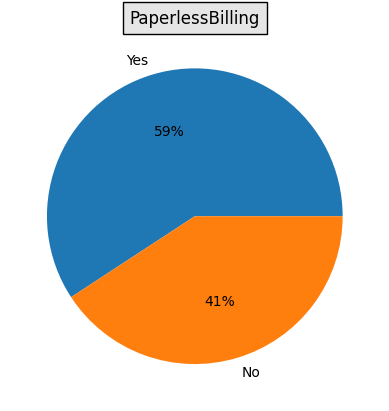

----------------------------------------------------------------------------------------------------


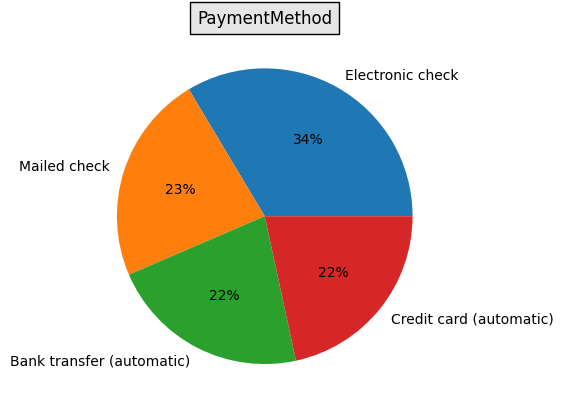

----------------------------------------------------------------------------------------------------


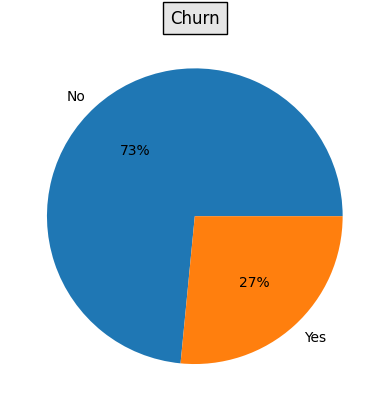

----------------------------------------------------------------------------------------------------


In [ ]:
#calling the function to plot pie-charts for categorical variable

pie_charts_for_CategoricalVar(df)   # dataframe = df

**InSights for Categorical features in pie plot:**
*   For 'Gender' feature, found unique value as 'Female' with 50% and unique value as 'Male' with 50% from the dataframe.
*   For 'Partner' feature, found unique value as 'No' with 52% and unique value as 'Yes' with 48% from the dataframe.
*   For 'Dependents' feature, found unique value as 'No' with 70% and unique value as 'Yes' with 30% from the dataframe.
*   For 'PhoneService' feature, found unique value as 'No' with 10% and unique value as 'Yes' with 90% from the dataframe.
*   For 'MultipleLines' feature, found unique value as 'No' with 48%, unique values as 'Yes' with 42% and unique value as 'No phone service' with 10% from the dataframe.
*   For 'InternetService' feature, found unique value as 'Fibre optic' with 44%,unique value as 'DSL' with 34% and unique value as 'No' with 22% from the dataframe.
*   For 'OnlineSecurity' feature, found unique value as 'No' with 49%, unique values as 'Yes' with 29% and unique value as 'No internet service' with 22% from the dataframe.
*   For 'OnlineBackup' feature, found unique value as 'No' with 44%, unique values as 'Yes' with 34% and unique value as 'No phone service' with 22% from the dataframe.
*   For 'DeviceProtection' feature, found unique value as 'No' with 44%, unique values as 'Yes' with 34% and unique value as 'No phone service' with 22% from the dataframe.
*   For 'TechSupport' feature, found unique value as 'No' with 49%, unique values as 'Yes' with 29% and unique value as 'No internet service' with 22% from the dataframe.
*   For 'StreamingTV' feature, found unique value as 'No' with 40%, unique values as 'Yes' with 38% and unique value as 'No internet service' with 22% from the dataframe.
*   For 'StreamingMovies' feature, found unique value as 'No' with 40%, unique values as 'Yes' with 38% and unique value as 'No internet service' with 22% from the dataframe.
*   For 'Contract' feature, found unique value as 'Month_to_month' with 55%, unique values as 'Two year' with 24% and unique value as 'One year' with 21% from the dataframe.
*   For 'PaperlessBilling' feature, found unique value as 'No' with 41% and unique values as 'Yes' with 59% from the dataframe.
*   For 'PaymentMethod' feature, found unique value as 'Electronic check' with 34%, unique values as 'Mailed check' with 23%, unique values as 'Bank transfer(automatic)' with 22% and unique value as 'Credit card(automatic)' with 22% from the dataframe.
*   For 'Churn' feature, found unique value as 'No' with 73% and unique values as 'Yes' with 27% from the dataframe.
*   On comparing all the features, the size of the slice is same for 'OnlineBackup'- 'DeviceProtection' & 'StreamingTV' - 'StreamingMovies'.





In [ ]:
# To get the target feature 'Churn' instances with unique values
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

For 'Churn' feature, found unique values count for 'No' is 5174 and for 'Yes' is 1869.

<Axes: >

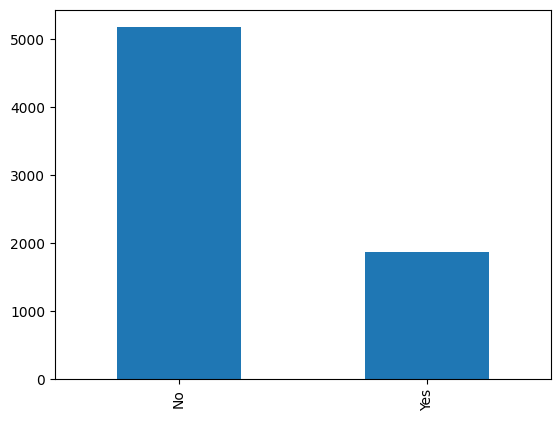

In [ ]:
# To plot the target feature 'Churn' instances with unique values using Bar plot
df['Churn'].value_counts().plot(kind='bar')

<Axes: ylabel='Churn'>

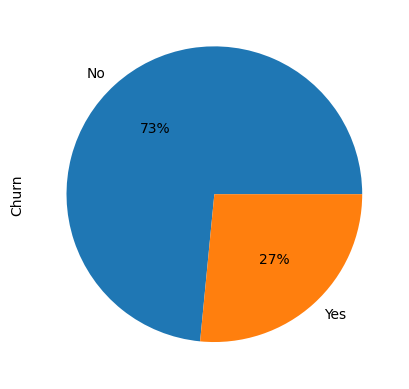

In [ ]:
# To plot the target feature 'Churn' instances with unique values using Pie plot with percentages
df['Churn'].value_counts().plot(kind='pie',autopct='%.0f%%')

For 'Churn' feature, found unique value as 'No' with 73% and unique value as 'Yes' with 27% from the given data.

In [ ]:
# To encode all the appropriate Categorical features
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object' and feature !='customerID': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
# To replace the existing categorical values to numeric values
RCols = {
                "Partner":     {"No": 2, "Yes": 1},
                "Dependents": {"No": 2, "Yes": 1},
                "PhoneService": {"No": 2, "Yes": 1},
                "MultipleLines":     {"No": 2, "Yes": 1, "No phone service": 3},
                "phone":     {"No": 2, "Yes": 1},
                "OnlineSecurity":     {"No": 2, "Yes": 1, "No internet service": 3},
                "OnlineBackup":     {"No": 2, "Yes": 1, "No internet service": 3},
                "DeviceProtection":     {"No": 2, "Yes": 1, "No internet service": 3},
                "TechSupport":     {"No": 2, "Yes": 1, "No internet service": 3},
                "StreamingTV":     {"No": 2, "Yes": 1, "No internet service": 3},
                "StreamingMovies":     {"No": 2, "Yes": 1, "No internet service": 3},
                "PaperlessBilling": {"No": 2, "Yes": 1},
                  "Churn":     {"No": 0, "Yes": 1}
                    }
# To assign the few categorical variables with onehotcoding technique using get_dummies
dummyCols=["gender","InternetService","Contract","PaymentMethod"]

In [ ]:
df=df.replace(RCols) # To replace the columns with numeric values
df=pd.get_dummies(df, columns=dummyCols) # using get_dummies for creating new columns
df.head(10) # To get the first 10 rows of the dataframe

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,2,1,2,3,2,1,2,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,2,2,34,1,2,1,2,1,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,2,2,1,2,1,1,2,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,2,2,45,2,3,1,2,1,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,2,2,2,1,2,2,2,2,...,0,1,0,1,0,0,0,0,1,0
5,9305-CDSKC,0,2,2,8,1,1,2,2,1,...,0,1,0,1,0,0,0,0,1,0
6,1452-KIOVK,0,2,1,22,1,1,2,1,2,...,0,1,0,1,0,0,0,1,0,0
7,6713-OKOMC,0,2,2,10,2,3,1,2,2,...,1,0,0,1,0,0,0,0,0,1
8,7892-POOKP,0,1,2,28,1,1,2,2,1,...,0,1,0,1,0,0,0,0,1,0
9,6388-TABGU,0,2,1,62,1,2,1,1,2,...,1,0,0,0,1,0,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   customerID                               7043 non-null   object  
 1   SeniorCitizen                            7043 non-null   int64   
 2   Partner                                  7043 non-null   category
 3   Dependents                               7043 non-null   category
 4   tenure                                   7043 non-null   int64   
 5   PhoneService                             7043 non-null   category
 6   MultipleLines                            7043 non-null   category
 7   OnlineSecurity                           7043 non-null   category
 8   OnlineBackup                             7043 non-null   category
 9   DeviceProtection                         7043 non-null   category
 10  TechSupport                         

In [ ]:
# To change the datatypes of the following features: 'Partner','Dependents','PhoneService','MultipleLines','OnilneSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn' to 'int/float'.

lst_key = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
lst_val = ['int64']*len(lst_key)

In [ ]:
data_dict = {lst_key[i]: lst_val[i] for i in range(len(lst_key))}

In [ ]:
data_dict

{'Partner': 'int64',
 'Dependents': 'int64',
 'PhoneService': 'int64',
 'MultipleLines': 'int64',
 'OnlineSecurity': 'int64',
 'OnlineBackup': 'int64',
 'DeviceProtection': 'int64',
 'TechSupport': 'int64',
 'StreamingTV': 'int64',
 'StreamingMovies': 'int64',
 'PaperlessBilling': 'int64',
 'Churn': 'int64'}

In [ ]:
df_new = df.astype(data_dict) # To change the datatype 'int64' to 'object'for the above 11 features

In [ ]:
df_new.dtypes # To get the individual feature data type

customerID                                  object
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                uint8
gender_Male                                  uint8
InternetService_DSL            

In [ ]:
df_new.drop('customerID', inplace = True, axis=1) # To drop the 'customerID' feature from the dataframe

In [ ]:
df_new.head() # To fetch the first 5 rows of the dataframe

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,2,1,2,3,2,1,2,2,...,1,0,0,1,0,0,0,0,1,0
1,0,2,2,34,1,2,1,2,1,2,...,1,0,0,0,1,0,0,0,0,1
2,0,2,2,2,1,2,1,1,2,2,...,1,0,0,1,0,0,0,0,0,1
3,0,2,2,45,2,3,1,2,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,2,2,2,1,2,2,2,2,2,...,0,1,0,1,0,0,0,0,1,0


**Data Preparation**

In [ ]:
# To split data into X and Y
# Create a separate dataframe consisting only of the features i.e independent attributes
X = df_new.drop('Churn',axis=1) # To drop 'Churn' feature
y = df_new['Churn']

In [ ]:
# To split data into train and test with 80:20 proportion
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state = 90,test_size=0.2)

In [ ]:
# To Standardise/Normalize the data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
import time # To use the time functions
def classify(classifier): # Using def for classifying the all classifiers models
    classifier.fit(x_train,y_train) # To fit the classifier model
    pred_train = classifier.predict(x_train) # To get the predicted value for train data of the classifier model
    pred_test = classifier.predict(x_test) # To get the predicted value for test data of the classifier model
    print('Training Performace')
    print(classification_report(y_train,pred_train))
    print('*'*50)
    print('Testing Performace')
    print(classification_report(y_test,pred_test))
    start_time = time.time()  # To get the number of seconds that have passed since the epoch or the current time passed since the epoch in seconds
    print("------%s seconds------" %(time.time() - start_time))

In [ ]:
# a) Using RandonForest Classifier
rf = RandomForestClassifier()
classify(rf)

Training Performace
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4126
           1       1.00      1.00      1.00      1508

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634

**************************************************
Testing Performace
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1048
           1       0.60      0.52      0.56       361

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

------7.152557373046875e-07 seconds------


**Observations for Random Forest Classifier**
*   Training Accuracy is 100%.
*   Testing Accuracy is 79%.
*   As Training Accuracy is equals to 100% leads to the model overfitting.






In [ ]:
# b) Using LogisticRegression Classifier
Lr = LogisticRegression()
classify(Lr)

Training Performace
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4126
           1       0.66      0.56      0.61      1508

    accuracy                           0.81      5634
   macro avg       0.76      0.73      0.74      5634
weighted avg       0.80      0.81      0.80      5634

**************************************************
Testing Performace
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1048
           1       0.65      0.58      0.61       361

    accuracy                           0.81      1409
   macro avg       0.75      0.74      0.74      1409
weighted avg       0.81      0.81      0.81      1409

------4.76837158203125e-07 seconds------


**Observations for LogisticRegression Classifier**
*   Training Accuracy is 81%.
*   Testing Accuracy is 81%.
*   As both Training & Testing Accuracy are almost equal leads to good fit with good outcome and model stable.

In [ ]:
# c) Using KNeighbors Classifier
Knn = KNeighborsClassifier()
classify(Knn)

Training Performace
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4126
           1       0.70      0.65      0.68      1508

    accuracy                           0.83      5634
   macro avg       0.79      0.78      0.78      5634
weighted avg       0.83      0.83      0.83      5634

**************************************************
Testing Performace
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1048
           1       0.55      0.56      0.55       361

    accuracy                           0.77      1409
   macro avg       0.70      0.70      0.70      1409
weighted avg       0.77      0.77      0.77      1409

------2.384185791015625e-07 seconds------


**Observations for KNeighbors Classifier**
*   Training Accuracy is 83%.
*   Testing Accuracy is 77%.
*   As Training Accuracy is morethan the Testing Accuracy leads the model to perform slightly better on the training data for making predictions i.e good fit.

In [ ]:
# d) Using SVM Classifier
svm = SVC()
classify(svm)

Training Performace
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4126
           1       0.70      0.54      0.61      1508

    accuracy                           0.81      5634
   macro avg       0.77      0.73      0.74      5634
weighted avg       0.81      0.81      0.81      5634

**************************************************
Testing Performace
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1048
           1       0.65      0.54      0.59       361

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

------4.76837158203125e-07 seconds------


**Observations for SVM Classifier**
*   Training Accuracy is 81%.
*   Testing Accuracy is 81%.
*   As both Training & Testing Accuracy are equal leads to good fit with good outcome and model stable.

In [ ]:
# e) Using XBGClassifier default parameters: 'max_depth':3, 'learning_rate':0.1,'n_estimators':100,'silent':True,'objective':"binary:logistic",nthread':1,'gamma':0, 'min_child_weight':1,
                                    #'max_delta_step':0, 'subsample':1, 'colsample_bytree':1, 'colsample_bylevel':1,'reg_alpha':0, 'reg_lambda':1, 'scale_pos_weight':1,'base_score':0.5, 'seed':0, 'missing':None
xbg = XGBClassifier()
classify(xbg)


Training Performace
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4126
           1       0.91      0.86      0.88      1508

    accuracy                           0.94      5634
   macro avg       0.93      0.91      0.92      5634
weighted avg       0.94      0.94      0.94      5634

**************************************************
Testing Performace
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1048
           1       0.62      0.55      0.58       361

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409

------2.384185791015625e-07 seconds------


**Observations for XBG Classifier**
*   Training Accuracy is 94%.
*   Testing Accuracy is 80%.
*   As Training Accuracy is too morethan the Testing Accuracy leads the model to perform better on the training data for making predictions but with less meaningful differences between the trained data of the model and the testing data provided.
Hence, need to improve the performance using Tuning Parameters so that to make model with good fit.

**Performance Improvement:**

**Tuning Parameters**

In [ ]:
# To tune the XGBClassifier model with few parameters - eta=0.3, n_estimators=140, min_child_weight=2, max_depth= 5, gamma=0
xbg = XGBClassifier(eta=0.3, n_estimators=140, min_child_weight=2, max_depth= 5, gamma=0)
classify(xbg)

Training Performace
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4126
           1       0.89      0.81      0.85      1508

    accuracy                           0.92      5634
   macro avg       0.91      0.89      0.90      5634
weighted avg       0.92      0.92      0.92      5634

**************************************************
Testing Performace
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1048
           1       0.62      0.54      0.58       361

    accuracy                           0.80      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

------4.76837158203125e-07 seconds------


**Observations for XBG Classifier after tuning with eta=0.3, n_estimators=140, min_child_weight=2, max_depth= 5, gamma=0**
*   Training Accuracy is 92%.
*   Testing Accuracy is 80%.
*   As Training Accuracy is too morethan the Testing Accuracy leads the model to perform better on the training data for making predictions but with less meaningful differences between the data trained and the testing data provided.
Hence, need to improve the performance using few more Tuning Parameters so that to make model with good fit.

**A) Using RandomSearch**

In [ ]:
%%time
model = XGBClassifier()
param = {
    'learning_rate': uniform(.05, .1)
    , 'subsample': uniform(.2, .3)
    , 'n_estimators': randint(20, 70)
    , 'min_child_weight': randint(20, 40)
    , 'reg_alpha': uniform(0, .7)
    , 'reg_lambda': uniform(0, .7)
    , 'colsample_bytree': uniform(.1, .7)
    , 'max_depth': randint(2, 6)
}

randomsearch = RandomizedSearchCV(model, param_distributions=param, n_iter=30, n_jobs=-1, scoring='accuracy', return_train_score=True)

randomsearch.fit(x_train, y_train) # To fit the model
print('best score of Randomized Search over 10 iterations:', randomsearch.best_score_)

best score of Randomized Search over 10 iterations: 0.8045799770213128
CPU times: user 643 ms, sys: 43.4 ms, total: 686 ms
Wall time: 14.5 s


In [ ]:
for k,v in (randomsearch.best_params_).items():
    print("Best value for {0} is {1:.2f}".format(k,v))
    print('-'*50)

Best value for colsample_bytree is 0.75
--------------------------------------------------
Best value for learning_rate is 0.14
--------------------------------------------------
Best value for max_depth is 3.00
--------------------------------------------------
Best value for min_child_weight is 28.00
--------------------------------------------------
Best value for n_estimators is 55.00
--------------------------------------------------
Best value for reg_alpha is 0.07
--------------------------------------------------
Best value for reg_lambda is 0.28
--------------------------------------------------
Best value for subsample is 0.35
--------------------------------------------------


In [ ]:
rs_pred = randomsearch.predict(x_test) # To get the predicted value of test data
print(classification_report(y_test,rs_pred)) # To print classification report for test data

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1048
           1       0.65      0.54      0.59       361

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [ ]:
rs_pred1 = randomsearch.predict(x_train) # To get the predicted value of the train data
print(classification_report(y_train,rs_pred1)) # To print classification report for train data

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      4126
           1       0.68      0.54      0.60      1508

    accuracy                           0.81      5634
   macro avg       0.76      0.72      0.74      5634
weighted avg       0.80      0.81      0.80      5634



**Observations for RandomSearch**
*   Training Accuracy is 81%.
*   Testing Accuracy is 81%.
*   As both Training & Testing Accuracy are equal leads to good fit with good outcome and model stable.

**B) Using GridSearch**

In [ ]:
%%time
param = {
    'learning_rate': [0.005, .1]
    , 'subsample': [.2, .3 ,.4, .5]
    , 'n_estimators': [25, 50]
    , 'min_child_weight': [25]
    , 'reg_alpha': [.3, .4, .5]
    , 'reg_lambda': [.1, .2, .3, .4, .5]
    , 'colsample_bytree': [.66]
    , 'max_depth': [5]
}

model = XGBClassifier(random_state=42, n_jobs=-1) #input hyperparameters without tuning
gridsearch = GridSearchCV(model, param_grid=param, cv=3, n_jobs=-1, scoring='accuracy', return_train_score=True)
gridsearch.fit(x_train, y_train) # To fit the model
print('best score of Grid Search over 120 iterations:', gridsearch.best_score_)

best score of Grid Search over 120 iterations: 0.8049343272985445
CPU times: user 1.74 s, sys: 113 ms, total: 1.85 s
Wall time: 1min 4s


In [ ]:
for k,v in (gridsearch.best_params_).items():
    print("Best value for %s is %.2f"%(k,v))
    print('-'*50)

Best value for colsample_bytree is 0.66
--------------------------------------------------
Best value for learning_rate is 0.10
--------------------------------------------------
Best value for max_depth is 5.00
--------------------------------------------------
Best value for min_child_weight is 25.00
--------------------------------------------------
Best value for n_estimators is 50.00
--------------------------------------------------
Best value for reg_alpha is 0.50
--------------------------------------------------
Best value for reg_lambda is 0.40
--------------------------------------------------
Best value for subsample is 0.50
--------------------------------------------------


In [ ]:
gs_pred = gridsearch.predict(x_test) # To get the predicted value of test data
print(classification_report(y_test,gs_pred)) # To print classification report for test data

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1048
           1       0.68      0.56      0.61       361

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.82      0.81      1409



**Observations for GridSearch**
*   Testing Accuracy is 82%.
*   As both Training & Testing Accuracy are almost equal leads to good fit with good outcome and model stable.

In [ ]:
xbg = XGBClassifier(eta=0.3, n_estimators=50, min_child_weight=25, max_depth= 5, gamma=0, colsample_bytree=0.66, reg_alpha=0.5, reg_lambda=0.4, subsample=0.5)
classify(xbg)

Training Performace
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      4126
           1       0.71      0.56      0.63      1508

    accuracy                           0.82      5634
   macro avg       0.78      0.74      0.76      5634
weighted avg       0.81      0.82      0.82      5634

**************************************************
Testing Performace
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1048
           1       0.66      0.54      0.60       361

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

------4.76837158203125e-07 seconds------


**Observations for XBG Classifier after tuning with eta=0.3, n_estimators=50, min_child_weight=25, max_depth= 5, gamma=0, colsample_bytree=0.66, reg_alpha=0.5, reg_lambda=0.4, subsample=0.5**
*   Training Accuracy is 82%.
*   Testing Accuracy is 81%.
*   As both Training & Testing Accuracy are almost equal leads to good fit with good outcome and model stable.

**Overall Improvement Achieved:**
* Training Accuracy improved by - 6-12% for the good fit of the model.
* Testing Accuracy improved by + 1-3%.  
* Precision, Recall and f1_score improved by +1-4%




**▶ PART - B**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Function to preprocesss the data
def preprocess_data(path_to_csv,target_feature):
    df = pd.read_csv(path_to_csv)  # To read the csv file

    # Impute missing values
    missing_values = df.isna().sum()
    missing_list = ((missing_values>0).index).tolist()
    for i in missing_list:
        if df[i].dtypes in ['int64','int32','float64','float32']:
            df[i].fillna(df[i].mean(),inplace=True)
        else:
            df[i].fillna(mode(df[i])[0][0],inplace=True)

    # Impute duplicate values
    df.drop_duplicates(inplace=True)

    #Impute unnecessary features
    for col in df.columns:
        unique_percentage = (df[col].value_counts().count()/df.shape[0])*100
        if unique_percentage > 95:
            df.drop(col,inplace=True,axis=1)
        else:
            pass

    return df,target_feature

In [ ]:
# Function to try various models and get performances of all the models
def train_model(preprocessed_df, target_feature):

    # Initialize variables
    le = LabelEncoder()
    model_lst = []
    train_acc_lst = []
    test_acc_lst = []
    test_precision_lst = []
    test_recall_lst = []
    testf1_score_lst = []

    # Encode the variables with 'Object' type
    for col in preprocessed_df.columns:
        if preprocessed_df[col].dtype == 'O':
            preprocessed_df[col] = le.fit_transform(preprocessed_df[col])
        else:
            pass

    # Split into X & y
    X = preprocessed_df.drop(target_feature,axis=1)
    y = preprocessed_df[target_feature]

    # Split into train and test
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

    # Intialize models
    lr = LogisticRegression()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    bgcl = BaggingClassifier()
    xgb = XGBClassifier()
    ada = AdaBoostClassifier()
    model_list = [lr, dt, rf, bgcl, ada, xgb]

    # Interate through models, train and measure performance
    for idx,i in enumerate(model_list):
        i.fit(x_train,y_train)    # To fit the modell
        train_pred= i.predict(x_train) # To get the predicted values of the train data for the model
        test_pred = i.predict(x_test) # To get the predicted values of the test data for the model

        train_acc = accuracy_score(y_train,train_pred) # To get the train accuracy of the model
        test_acc = accuracy_score(y_test,test_pred) # To get the test accuracy of the model
        test_precision = precision_score(y_test,test_pred,average='weighted') # To get the precision of test data for the model
        test_recall = recall_score(y_test,test_pred,average='weighted') # To get the recall of test data for the model
        testf1_score = f1_score(y_test,test_pred,average='weighted') # To get the f1_score of test data for the model


        # Update model performance into a DataFrame
        model_lst.append(i)
        train_acc_lst.append(train_acc) # To add all the models training accuracies in a list
        test_acc_lst.append(test_acc) # To add all the models testing accuracies in a list
        test_precision_lst.append(test_precision) # To add all the models precision values in a list
        test_recall_lst.append(test_recall) # To add all the the models recall values in a list
        testf1_score_lst.append(testf1_score) # To add all the models f1_scores in a list
        col_names = ['Model','Train_accuracy','Test_acc','Test_precision','Test_recall','Test_F1 score']
        model_performance = pd.DataFrame(list(zip(model_lst,train_acc_lst,test_acc_lst,test_precision_lst,test_recall_lst,testf1_score_lst)),columns=col_names)

    return model_performance,x_train,y_train

In [ ]:
# Function to pickle the model with best weights
def pickle_model(model_performance,x_train,y_train,file_name):
    best_model = model_performance[model_performance['Train_accuracy']==max(model_performance['Train_accuracy'])]['Model'].iloc[0]
    best_model.fit(x_train,y_train) # To fit the model
    with open(file_name, 'wb') as handle:
        pickle.dump(best_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Main function to call or to stack all the functions
def main(path_to_csv,target_feature):
    preprocessed_df,target_feature = preprocess_data(path_to_csv,target_feature) # To call the preprocess_data(path_to_csv,target_feature) function
    model_df,x_train,y_train = train_model(preprocessed_df, target_feature) # To call the train_model(preprocessed_df, target_feature)
    pickle_model(model_df,x_train,y_train,'model.pkl') # To call the pickle_model(model_performance,x_train,y_train,file_name) function
    return model_df

In [ ]:
data = main('/content/drive/MyDrive/AI /Dec AI/Project - Ensemble Techniques/TelcomCustomer-Churn_1.csv','OnlineSecurity') # To call main(path_to_csv,target_feature) function

In [ ]:
data #To print the values

,Model,Train_accuracy,Test_acc,Test_precision,Test_recall,Test_F1 score
0,LogisticRegression(),0.780440,0.775018,0.768617,0.775018,0.767527
1,DecisionTreeClassifier(),0.890131,0.726047,0.719264,0.726047,0.721424
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.890131,0.733854,0.731387,0.733854,0.732467
3,(DecisionTreeClassifier(random_state=921314528...,0.883742,0.714691,0.712424,0.714691,0.713454
4,"(DecisionTreeClassifier(max_depth=1, random_st...",0.783103,0.782825,0.777116,0.782825,0.774651
5,"XGBClassifier(base_score=None, booster=None, c...",0.851083,0.751597,0.744722,0.751597,0.746049


**Overall InSights:-**
*   By comparing all the models, Train Accuracy of Adaboost Classifier 78.31% is the best one.
*   Testing Accuracy of Adaboost Classifier 78.28% is the best one.
*   Precision,Recall,f1_score of Adaboost Classifier 77.71%,78.28% and 77.46% are the best one.
*   As both Training & Testing Accuracy are almost equal leads to good fit with good outcome and model stable.
*   As OnlineSecurity of the customers should be at the forefront, Recall should be considered to reduce the risk(i.e Recall is higher than Precision).
*   Hence, Adaboost Classifier suits best for the data considered.







